<a href="https://colab.research.google.com/github/jcdumlao14/Supervised-Learning-Algorithms--Classification/blob/main/2_LogisticRegAdvertisement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Logistic Regression for Advertisement**

Refernces: https://www.kaggle.com/datasets/rizdelhi/my-datasets

# **Loading Libraries**

In [ ]:
import pandas as pd # Data analysis and manipulation tool
import numpy as np # A fundamental package for scientific computing with Python
import matplotlib.pyplot as plt # For interactive visualization in Python
import seaborn as sns # Data visualization library based on matplotlib. It provides a high-level interface


## **1.Loading Data**

Pandas module is used for reading files. We have our data in '.csv' format. We will use 'read_csv()' function for loading the data.



In [ ]:
data = pd.read_csv('/content/advertising.csv')

In [ ]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
data.info() # Returns a concise summary of a dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
# Basic statistical details
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Text(0, 0.5, 'Number of data points')

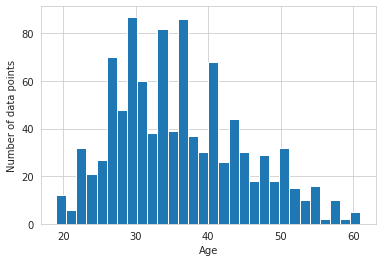

In [ ]:
# Plotting histogram of the age variable
sns.set_style('whitegrid') # sets the style of the plots; it affects things like color of the axes, whether grid enabled or not.
data['Age'].hist(bins=30) # plots histogram with with bins = 30
plt.xlabel('Age') # labels the x - axis as 'Age'
plt.ylabel('Number of data points') # labels y - axis as 'Number of data points'

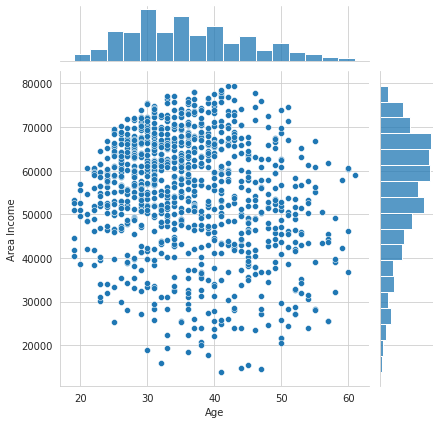

In [ ]:
# Joint plot for 'Area Income' and 'Age'
# Plots two variables with bivariate and univariate graphs
sns.jointplot(x='Age',y='Area Income',data=data)

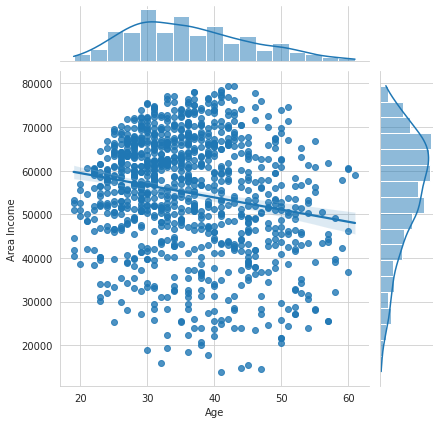

In [ ]:
sns.jointplot(x='Age',y='Area Income',data=data, kind = 'reg') # with regression line in the scatter plot and kernel density curve in both histograms

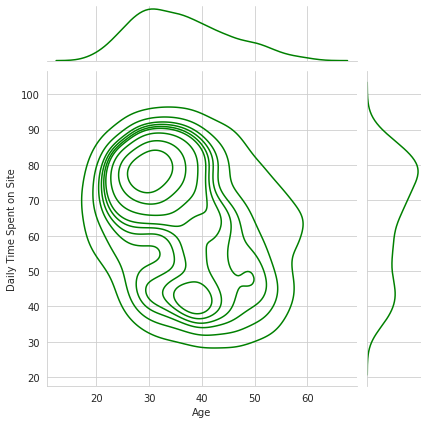

In [ ]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=data,color='green',kind='kde') 

The above plot is showing which region has maximum density of customers and Daily time spent on the site. The customer in the range 20 to 40 is more in count and they spent around 65 to 90 minutes on the site.

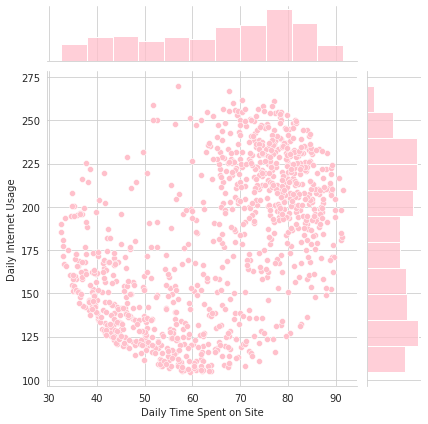

In [ ]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=data,color='pink')

There are very few customers with less internet usage than the average internet use. Customers who spent 35 to 65 minutes on the site are averagely less than 175 minutes on the internet and those who spent 70 to 85 minutes on the site are averagely more than 180-185 minutes on the internet.

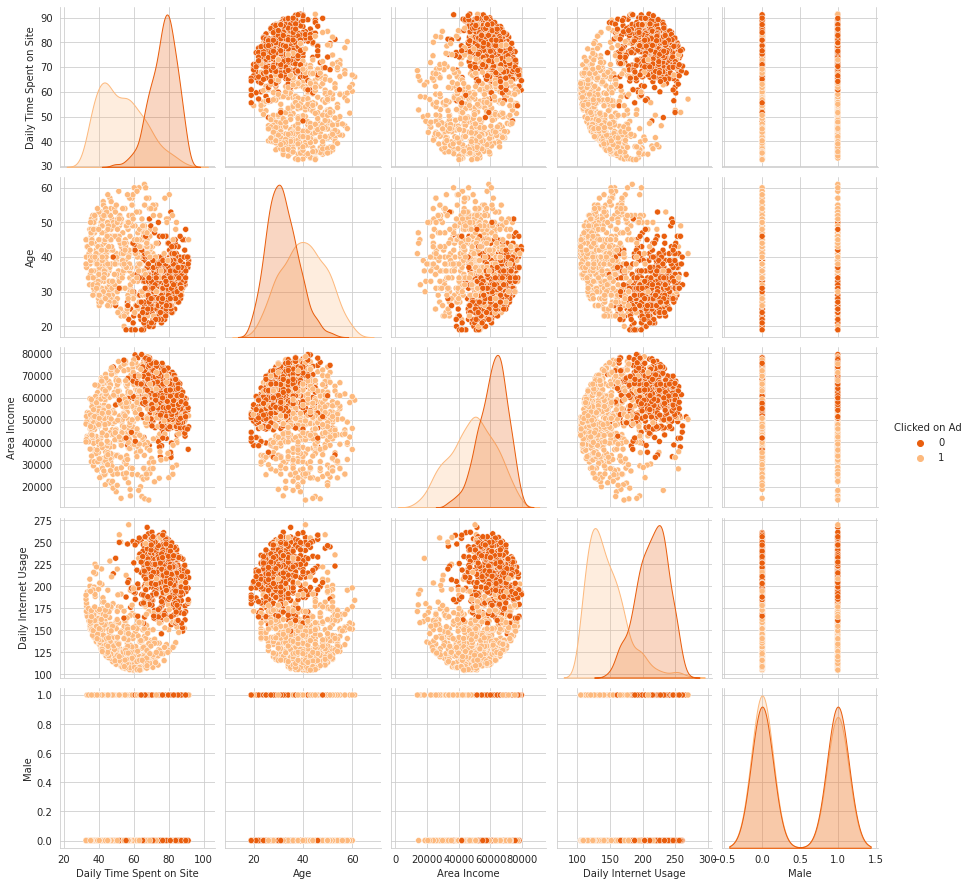

In [ ]:
sns.pairplot(data,hue='Clicked on Ad',palette='Oranges_r') # plots pairwise relationships between different features

## **2. Split the data into train and test set**

In [ ]:
# Separate feature columns and target column
X = data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']] # feature columns
y = data['Clicked on Ad'] # target column

In [ ]:
# train_test_split is used to split the dataset into test set and train set
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


## **3.Train a Logistic Regression model**


In [ ]:
print("Original shape of dataset: {}".format(data.shape)) # shape of original dataset
print("Shape of training dataset: {}".format(X_train.shape)) # shape of training dataset after split
print("Shape of testing dataset: {}".format(X_test.shape)) # shape of testing dataset after split


Original shape of dataset: (1000, 10)
Shape of training dataset: (700, 5)
Shape of testing dataset: (300, 5)


In [ ]:
# Import the Logistic Regression class from sklear.linear_model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression() # creating object 'logmodel' for LogisticRegression class
logmodel.fit(X_train,y_train) # Fitting the model

LogisticRegression()

## **4. Prediction**

Now predict values for the testing data.

In [ ]:
predictions = logmodel.predict(X_test) # predict for test data i.e. X_test

In [ ]:
# look at the prected values
predictions

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [ ]:
len(predictions) # we have 300 records in X_test, so we have 300 predicted values

300

## **Evaluation Metrics**

Evaluating machine learning algorithm is an important part of any project. Here we will use accuracy score to evaluate our model.

In [ ]:
# Import accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.8966666666666666


Our model is predicting 89.6% correct results.